<a href="https://colab.research.google.com/github/r42arty/hse/blob/main/TMP/Khalilov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Практическое домашнее задание 1 </center>

*`credits to ML course by E. Sokolov`*

### Общая информация

Дата выдачи: 01.02.2025

Первый дедлайн: 07:59MSK 20.02.2025

Второй дедлайн: 07:59MSK 24.02.2025

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки `pandas` и визуализации с помощью `matplotlib`. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи).

**Штраф за каждый день просрочки мягкого дедлайна**: 0.5 баллов. После жесткого дедлайна работы не принимаются.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник.

### Формат сдачи
Задания сдаются через гугл-форму https://forms.gle/pT6CtSPNRXoqd64d6. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [ ]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [ ]:
print("Привет, проверяющему! 🎉\nЕсли вы читаете это, значит, проверка идёт успешно! 🚀")

Привет, проверяющему! 🎉
Если вы читаете это, значит, проверка идёт успешно! 🚀


# Формула всемироного притяжения

$$ F = \frac{G m_1 m_2}{r^2} $$

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [ ]:
%pylab inline
import pandas as pd
from IPython.display import display

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Скачаем подготовленные данные командой ниже:

In [ ]:
#!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

In [ ]:
!curl -sL -o end_seminar.xlsx "https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1"

Active code page: 866


**В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.**

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

In [ ]:
import pandas as pd
df = pd.read_excel("end_seminar.xlsx")

df.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


#### 2. [1 балл] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [ ]:
missing_counts = df.isnull().sum()

print("количество пропущенных значений в столбце:")
print(missing_counts)

print("\nстолбцы с пропущенными значениями:")
print(missing_counts[missing_counts > 0])

количество пропущенных значений в столбце:
timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

столбцы с пропущенными значениями:
18_group         138
is_mi            343
is_first_time      2
17_group         223
blended          223
is_ml_student    304
dtype: int64


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [ ]:
import numpy as np
numeric_cols = df.select_dtypes(include=['number']).columns
object_cols = df.select_dtypes(include=['object']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)
df[object_cols] = df[object_cols].fillna("")
print("Обновлённый DataFrame (первые 100 строк):")
print(df.head(100))
print("\nКоличество непустых значений в каждом столбце:")
print(df.count())

Обновлённый DataFrame (первые 100 строк):
                 timestamp                                id  rating  \
0  2020-05-15 01:12:50.543  93ff79a51cd602f1dd3028ba2c129503     698   
1  2020-05-15 02:46:48.066  26b01b1c4cd5656bab18d24c548834fb     647   
2  2020-05-15 03:12:41.480  30f3653fc176d54e89ac3179c455c6dd     624   
3  2020-05-15 04:43:08.994  1528f0eaa027580820ccf0d92a53ad68     579   
4  2020-05-15 07:47:17.197  496ea4f0d4abe264b1bb1b80eb3830c5     572   
..                     ...                               ...     ...   
95 2020-05-18 18:29:57.440  88ae08d9db8d34b267780ed642d0d2db     581   
96 2020-05-18 18:30:23.257  cd8299f4173e8a509275b25787670ad2     704   
97 2020-05-18 18:38:41.094  5ee2ad618729a6dc3bdb7f2858826ef0     628   
98 2020-05-18 18:53:41.094  5ee2ad618729a6dc3bdb7f2858826ef0     628   
99 2020-05-18 18:55:40.236  32fea7beb180e7de64ad408013cc01ec     539   

    18_group  is_mi                             fall_1  \
0      181.0    0.0                

![Hmm](https://i.gifer.com/2mVW.gif)

#### 3. [1 балл] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [ ]:
no_count = (df['is_first_time'] == "Нет").sum()
print("количество ответов 'Нет' в 'is_first_time' до удаления дублей:", no_count)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df_unique = df.drop_duplicates(subset="id", keep="last")
print("размер исходного DataFrame:", df.shape)
print("размер DataFrame после удаления повторных", df_unique.shape)
df = df_unique
no_count_after = (df['is_first_time'] == "Нет").sum()
print("количество ответов 'Нет' в 'is_first_time' после удаления дублей:", no_count_after)

количество ответов 'Нет' в 'is_first_time' до удаления дублей: 51
размер исходного DataFrame: (361, 16)
размер DataFrame после удаления повторных (347, 16)
количество ответов 'Нет' в 'is_first_time' после удаления дублей: 51


#### 4. [1 балл] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [ ]:
a_18 = df['18_group'].astype(bool).sum()
a_17 = df['17_group'].astype(bool).sum()
print("Заявки из групп 18-го года набора:", a_18)
print("Заявки из групп 17-го года набора:", a_17)
d_1 = df['percentile'].value_counts()
duplicates_exist = (d_1 > 1).any()
if duplicates_exist:
    print("Есть студенты с равными перцентилями")
else:
    print("Нет равных перцентилей")

Заявки из групп 18-го года набора: 213
Заявки из групп 17-го года набора: 134
Есть студенты с равными перцентилями


#### 5. [1 балл] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [ ]:
df_blended = df[df['17_group'].notna() & df['blended'].notna() & (df['blended'] != "")]
a_courses = df_blended['blended'].unique()
print("blended-курсы для четверокурсников:", a_courses)
c_1 = df_blended['blended'].value_counts()
a_max_course = c_1.idxmax()
a_max_count = c_1.max()
print("наибольшее количество студентов записались на blended-курс:", a_max_course, a_max_count)
g_1 = df_blended.groupby('blended')['rating'].mean()
a_top_course = g_1.idxmax()
a_top_course_count = df_blended[df_blended['blended'] == a_top_course].shape[0]
print("blended-курс с самым высоким средним рейтингом:", a_top_course, "количество студентов:", a_top_course_count)

blended-курсы для четверокурсников: ['DevOps' 'Введение в дифференциальную геометрию'
 'Соревновательный анализ данных']
наибольшее количество студентов записались на blended-курс: DevOps 87
blended-курс с самым высоким средним рейтингом: Введение в дифференциальную геометрию количество студентов: 15


#### 6. [1.5 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [ ]:
df = df.copy()
df['blended'] = df['blended'].replace(0, 'Нет').fillna('Нет')
dup_courses = df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).size().reset_index(name='count')
dup_courses = dup_courses[dup_courses['count'] > 1]
print("Наборы курсов, выбранных более чем одним студентом:")
display(dup_courses)

Наборы курсов, выбранных более чем одним студентом:


,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,count
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [ ]:
course_cols = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

group18 = df[df['18_group'].astype(bool)]
group17 = df[df['17_group'].astype(bool)]
courses_18 = set(pd.unique(group18[course_cols].values.ravel()))
courses_17 = set(pd.unique(group17[course_cols].values.ravel()))
courses_18 = {course for course in courses_18 if course not in ["", "Нет"]}
courses_17 = {course for course in courses_17 if course not in ["", "Нет"]}

common_courses = courses_18.intersection(courses_17)
exclusive_18 = courses_18.difference(courses_17)
exclusive_17 = courses_17.difference(courses_18)

print("Курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года:")
print(sorted(common_courses))

Курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года:
['Statistical Learning Theory', 'Безопасность компьютерных систем', 'Высокопроизводительные вычисления', 'Моделирование временных рядов', 'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга', 'Численные методы']


![PC](https://i.gifer.com/6M8G.gif)

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [ ]:
print("\nКурсы, предлагаемые только студентам 18-го года набора:")
print(sorted(exclusive_18))
print("\nКурсы, предлагаемые только студентам 17-го года набора:")
print(sorted(exclusive_17))


Курсы, предлагаемые только студентам 18-го года набора:
['Анализ данных в бизнесе', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерные сети', 'Матричные вычисления', 'Машинное обучение 2', 'Промышленное программирование на языке Java', 'Системы баз данных', 'Теория баз данных', 'Язык SQL']

Курсы, предлагаемые только студентам 17-го года набора:
['DevOps', 'Анализ неструктурированных данных', 'Байесовские методы машинного обучения', 'Введение в дифференциальную геометрию', 'Генеративные модели в машинном обучении', 'Глубинное обучение в обработке звука', 'Компьютерное зрение', 'Конфликты и кооперация', 'Методы сжатия и передачи медиаданных', 'Обучение с подкреплением', 'Проектирование и разработка высоконагруженных сервисов', 'Символьные вычисления', 'Соревновательный анализ данных']


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
import matplotlib as mpl
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

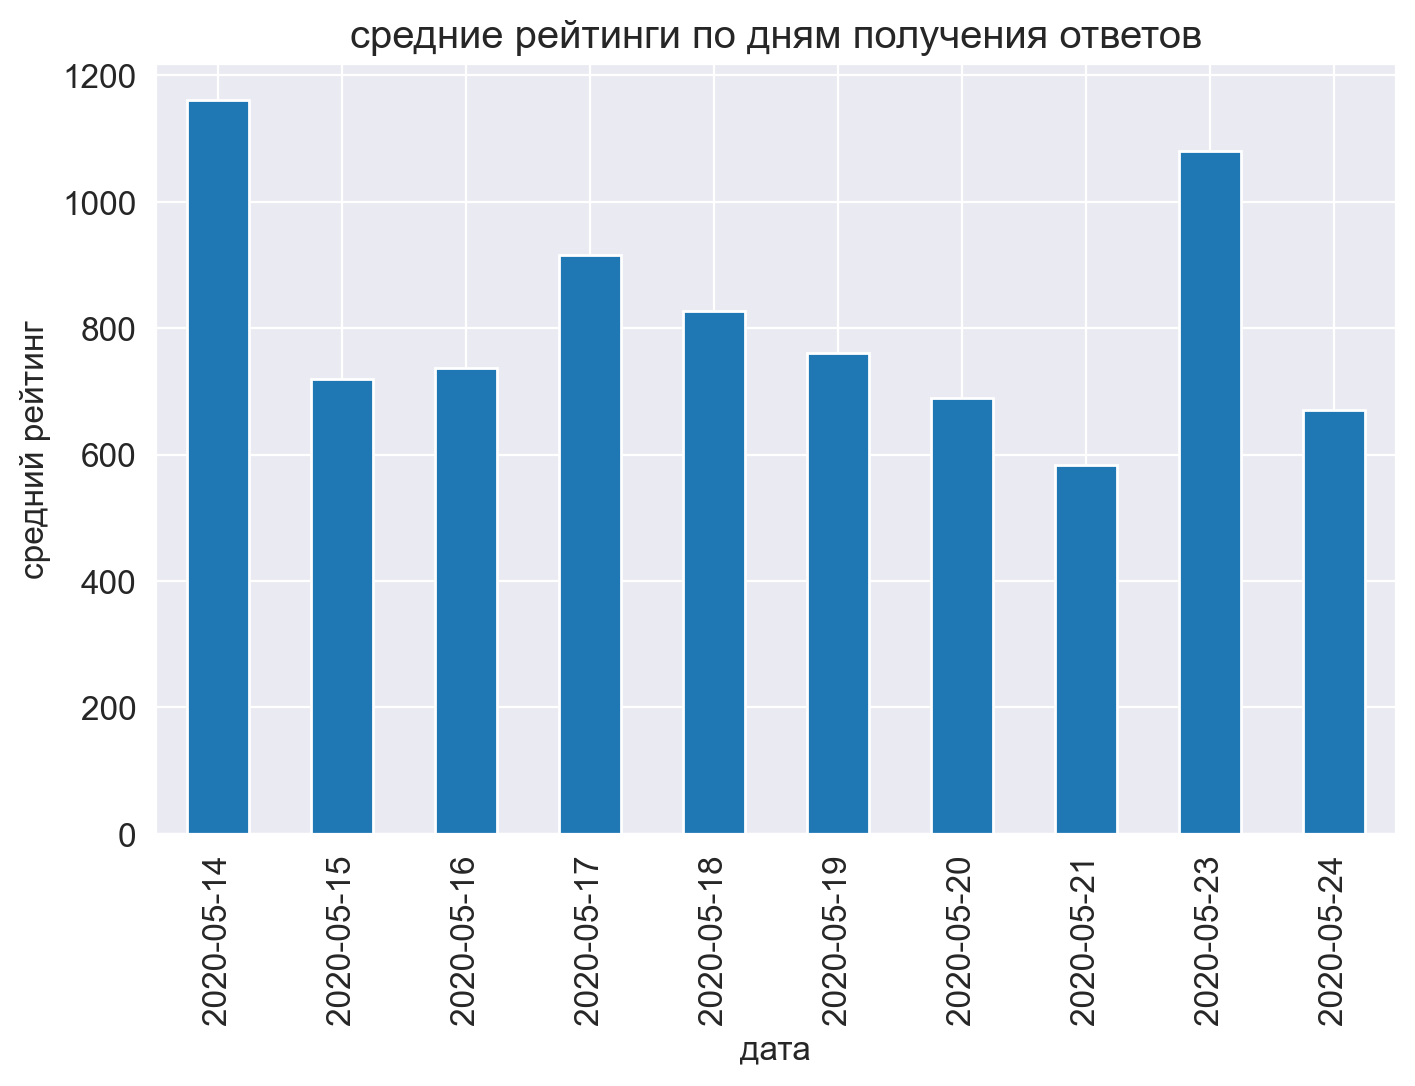

In [ ]:
df['date'] = df['timestamp'].dt.date
avg_rating = df.groupby('date')['rating'].mean()
avg_rating.plot(kind='bar')
plt.xlabel("дата")
plt.ylabel("средний рейтинг")
plt.title("средние рейтинги по дням получения ответов")
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

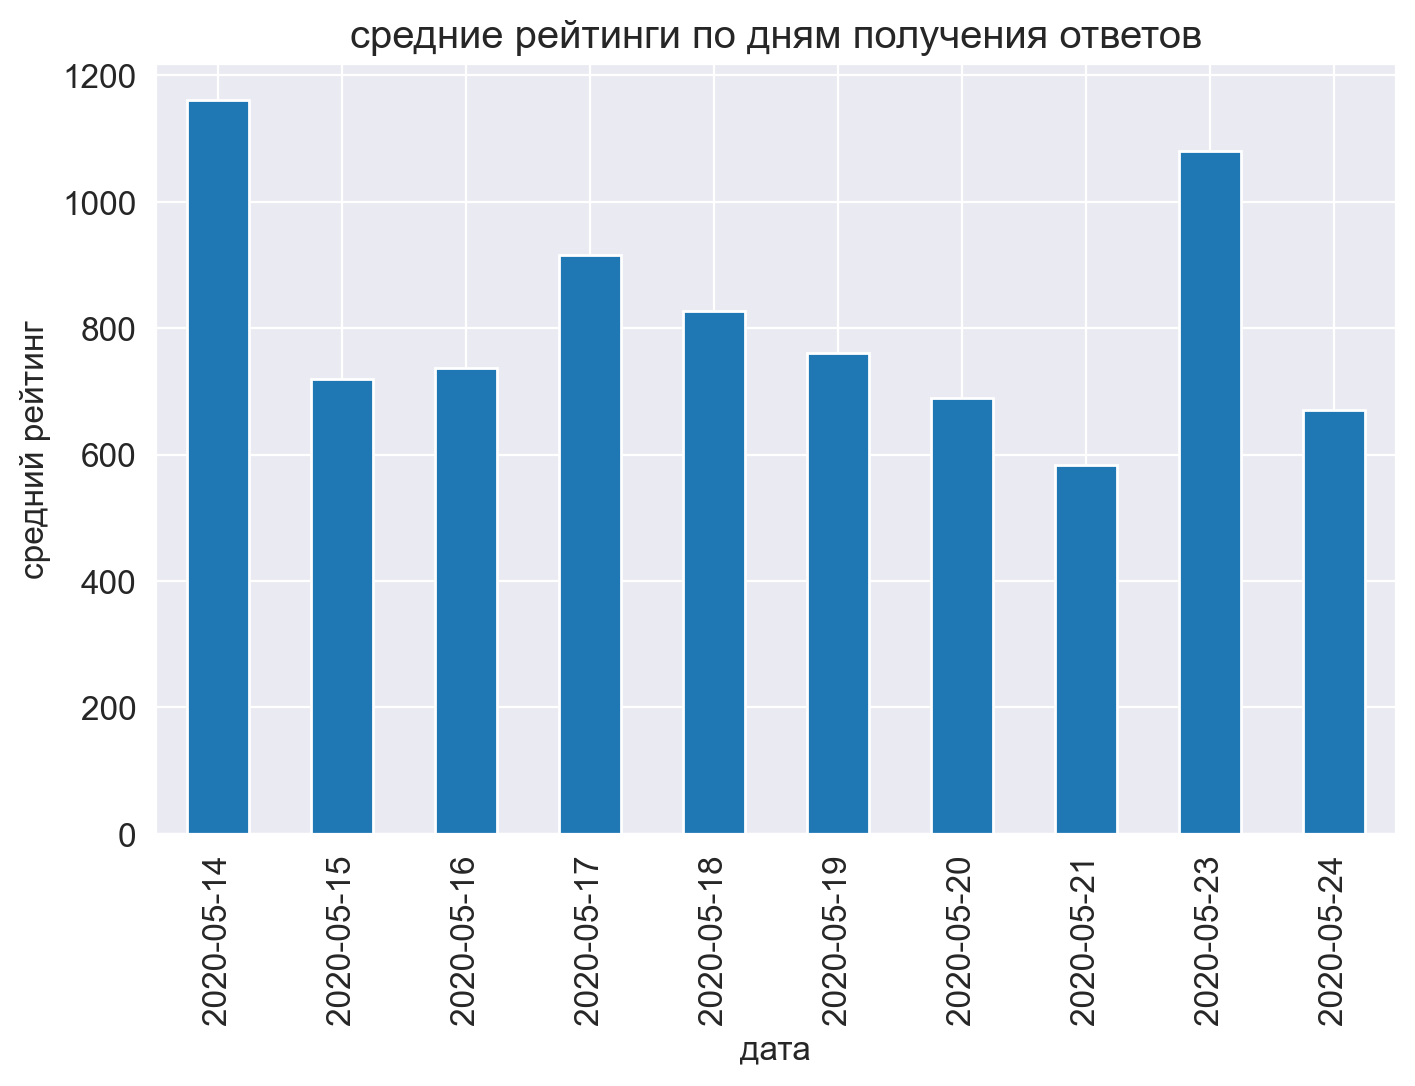

In [ ]:
fig, ax = plt.subplots()
avg_rating.plot(kind='bar', ax=ax)
ax.set_xlabel("дата")
ax.set_ylabel("средний рейтинг")
ax.set_title("средние рейтинги по дням получения ответов")
plt.savefig("rate.pdf")

![Graph](https://i.gifer.com/7yAb.gif)

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [ ]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1.5 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [ ]:
df_new = df.copy()
df_new['fall_courses_count'] = 1

cond1 = (df_new['17_group'] > 0) & ((df_new['17_group'].isin([171, 172, 173])) | (df_new['is_ml_student'] == 1))
df_new.loc[cond1, 'fall_courses_count'] = 2

cond2 = (df_new['18_group'] > 0) & (df_new['is_mi'] == 1)
df_new.loc[cond2, 'fall_courses_count'] = 2

df = df_new

Проверка:

In [ ]:
col_name = 'fall_courses_count'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

![Панда](https://i.gifer.com/ztm.gif)

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [ ]:
import pandas as pd

def get_first_priority_students(crs):
    one = df[(df['fall_courses_count'] == 1) & (df['fall_1'] == crs)]
    two = df[(df['fall_courses_count'] == 2) & ((df['fall_1'] == crs) | (df['fall_2'] == crs))]
    return pd.concat([one, two])

def assign_course(idx, crs):
    cur = df.at[idx, 'fall_courses']
    df.at[idx, 'fall_courses'] = crs if cur == '' else cur + ', ' + crs
    course_counts[crs] = course_counts.get(crs, 0) + 1

def print_stats_table():
    data = []
    for crs, cnt in sorted(course_counts.items()):
        lim_val = fall_course_limits.get(crs, base_lim)
        lim_str = 'inf' if lim_val == float('inf') else str(lim_val)
        data.append([crs, cnt, lim_str])
    stats_df = pd.DataFrame(data, columns=["Курс", "Студенты", "Лимит"])
    print("Статистика первой волны:")
    print(stats_df.to_string(index=False))
    print()

# --- переменные ---
df['fall_courses'] = ''  # итог курсы
course_counts = {}       # счетчик

fall_course_limits = {   # лимиты
    'Statistical Learning Theory': 60,
    'Высокопроизводительные вычисления': 60,
    'Анализ неструктурированных данных': float('inf')
}
base_lim = 30

courses_candidates = set(df['fall_1'].dropna().unique()) | set(df['fall_2'].dropna().unique())
courses_candidates.discard('')  # чистка

# --- основная логика ---
for crs in courses_candidates:
    candidates = get_first_priority_students(crs)
    if candidates.empty:
        continue
    limit = fall_course_limits.get(crs, base_lim)
    selected = candidates.sort_values('percentile', ascending=True)
    if limit != float('inf'):
        selected = selected.head(limit)
    for idx in selected.index:
        if crs not in df.at[idx, 'fall_courses']:
            assign_course(idx, crs)

print_stats_table()

for crs in course_counts.keys():
    mask = df['fall_courses'].apply(lambda x: crs in x.split(', ') if x != '' else False)
    if mask.any():
        subset = df.loc[mask]
        min_pct = subset['percentile'].min()
        max_pct = subset['percentile'].max()
        df.loc[mask & (df['percentile'] == min_pct), 'is_first_place'] = True
        df.loc[mask & (df['percentile'] == max_pct), 'is_last_place'] = True

sorted_df = df.sort_values('id', ascending=True)
sorted_df.to_csv('df_clean.csv', index=False)

print("(= df_clean.csv =)")

Статистика первой волны:
                                                Курс  Студенты Лимит
                         Statistical Learning Theory        33    60
                   Анализ неструктурированных данных        48   inf
               Байесовские методы машинного обучения        24    30
                    Безопасность компьютерных систем        30    30
                   Высокопроизводительные вычисления        44    60
                Глубинное обучение в обработке звука        23    30
                                Матричные вычисления        15    30
                       Моделирование временных рядов        30    30
Принятие решений в условиях риска и неопределённости         8    30
     Сбор и обработка данных с помощью краудсорсинга        30    30
                                   Теория баз данных        14    30
                                            Язык SQL        29    30

(= df_clean.csv =)


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [ ]:
#!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
#!curl -L -o "2_task_check.csv" "https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=1"
check_df = pd.read_csv("2_task_check.csv")

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [ ]:
fir_col_name = "is_first_place"    # insert name of your new column with is_first_place as str
last_col_name = "is_last_place"  # insert name of your new column with is_last_place as str

assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

![Панда](https://i.gifer.com/zwa.gif)

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [ ]:
import pandas as pd

df['b_courses'] = ''      # курсы
count = {}                # счетчик
lim = {                   # лимиты
    'Statistical Learning Theory': 60,
    'Высокопроизводительные вычисления': 60,
    'Анализ неструктурированных данных': float('inf')
}
base_lim = 30             # баз. лимит
a_candidates = set(df['fall_1'].dropna().unique()) | set(df['fall_2'].dropna().unique())
a_candidates.discard('')  # чистка

# --- функции ---
def get_first(course):
    one = df[(df['fall_courses_count'] == 1) & (df['fall_1'] == course)]
    two = df[(df['fall_courses_count'] == 2) & ((df['fall_1'] == course) | (df['fall_2'] == course))]
    return pd.concat([one, two])

def assign_c(idx, course):
    cur = df.at[idx, 'b_courses']
    df.at[idx, 'b_courses'] = course if cur == '' else cur + ', ' + course
    count[course] = count.get(course, 0) + 1

def get_cols(row):
    assigned = row['b_courses'].split(', ') if row['b_courses'] else []
    if row['fall_courses_count'] == 1:
        return pd.Series([assigned[0] if len(assigned) >= 1 else "???", "-"])
    elif row['fall_courses_count'] == 2:
        return pd.Series([assigned[0] if len(assigned) >= 1 else "???",
                          assigned[1] if len(assigned) >= 2 else "???"])
    else:
        return pd.Series(["???", "???"])

def print_table(title, wave_count):
    data = []
    for course, cnt in sorted(wave_count.items()):
        l_val = lim.get(course, base_lim)
        l_str = 'inf' if l_val == float('inf') else str(l_val)
        data.append([course, cnt, l_str])
    tbl = pd.DataFrame(data, columns=["Course", "Count", "Limit"])
    print(title)
    print(tbl.to_string(index=False))
    print()

# --- логика ---
# волна 1
for course in a_candidates:
    cand = get_first(course)
    if cand.empty:
        continue
    sel = cand.sort_values('percentile', ascending=True)
    lim_val = lim.get(course, base_lim)
    if lim_val != float('inf'):
        sel = sel.head(lim_val)
    for idx in sel.index:
        if course not in df.at[idx, 'b_courses']:
            assign_c(idx, course)
wave1_count = count.copy()  # счет после волны 1

# волна 2
for idx, row in df.iterrows():
    assigned = row['b_courses'].split(', ') if row['b_courses'] else []
    needed = row['fall_courses_count'] - len(assigned)
    if needed > 0 and row['fall_courses_count'] == 2:
        course = row['fall_3']
        if course and course not in assigned:
            cur_cnt = count.get(course, 0)
            l_val = lim.get(course, base_lim)
            if cur_cnt < l_val or l_val == float('inf'):
                assign_c(idx, course)
wave2_count = count.copy()  # счет после волны 2

# волна 3
for idx, row in df.iterrows():
    assigned = row['b_courses'].split(', ') if row['b_courses'] else []
    needed = row['fall_courses_count'] - len(assigned)
    if needed > 0:
        for course in a_candidates:
            if needed <= 0:
                break
            if course not in assigned:
                cur_cnt = count.get(course, 0)
                l_val = lim.get(course, base_lim)
                if cur_cnt < l_val or l_val == float('inf'):
                    assign_c(idx, course)
                    needed -= 1
wave3_count = count.copy()  # счет после волны 3

res_df = pd.DataFrame()
res_df['ID'] = df['id']
res_df[['course1', 'course2']] = df.apply(get_cols, axis=1)
res_df.to_csv('res_fall.csv', index=False)

# --- вывод ---
print_table("After Wave 1:", wave1_count)
print_table("After Wave 2:", wave2_count)
print_table("After Wave 3:", wave3_count)
print("(= res_fall.csv =)")

After Wave 1:
                                              Course  Count Limit
                         Statistical Learning Theory     33    60
                   Анализ неструктурированных данных     48   inf
               Байесовские методы машинного обучения     24    30
                    Безопасность компьютерных систем     30    30
                   Высокопроизводительные вычисления     44    60
                Глубинное обучение в обработке звука     23    30
                                Матричные вычисления     15    30
                       Моделирование временных рядов     30    30
Принятие решений в условиях риска и неопределённости      8    30
     Сбор и обработка данных с помощью краудсорсинга     30    30
                                   Теория баз данных     14    30
                                            Язык SQL     29    30

After Wave 2:
                                              Course  Count Limit
                         Statistical Learning T

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv к форме.

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

![Усталость](https://i.gifer.com/1lyu.gif)